In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
counts_csv = '20200521_maternal500wo_outliers_counts_per_sample_meta_clust.csv'
counts_filepath = os.path.join(subsample_path, counts_csv)
cell_counts = pd.read_csv(counts_filepath)  

In [3]:
cell_counts.head(5)

,cell_type_v2,compartment,organ,location,day,challenge,timePI,cage,id,test_status,counts,sample,sample_total,frac_of_comp_sample,compartment2
0,B cells,PB-EV,PB,EV,E10.5,sal,2hr,6942,8,test,194,6942_8_E10.5_sal_2hr_PB_EV,494,0.392713,PB-EV
1,B cells,PB-EV,PB,EV,E10.5,sal,2hr,6943,15,test,251,6943_15_E10.5_sal_2hr_PB_EV,484,0.518595,PB-EV
2,B cells,PB-EV,PB,EV,E10.5,sal,2hr,6944,16,test,142,6944_16_E10.5_sal_2hr_PB_EV,496,0.286290,PB-EV
3,B cells,PB-EV,PB,EV,E10.5,sal,2hr,6944,17,test,242,6944_17_E10.5_sal_2hr_PB_EV,485,0.498969,PB-EV
4,B cells,PB-EV,PB,EV,E10.5,sal,2hr,9582,15,test,135,9582_15_E10.5_sal_2hr_PB_EV,459,0.294118,PB-EV


In [12]:
cell_list = cell_counts['cell_type_v2'].unique().tolist()

In [13]:
cell_counts_piv = cell_counts.pivot_table(index = ['compartment2', 'day', 'cage', 'id'], 
                                          columns = 'cell_type_v2', 
                                     values = 'frac_of_comp_sample')
cell_counts_piv.reset_index(inplace = True)
cell_counts_piv.loc[:,cell_list] = cell_counts_piv.loc[:,cell_list].fillna(0)
cell_counts_piv.loc[:, 'cage'] = cell_counts_piv.loc[:, 'cage'].astype('category')

In [14]:
cell_counts_piv.head(5)

cell_type_v2,compartment2,day,cage,id,B cells,Basophils,CD4+ T cells,CD8+ T cells,Eosinophils,Monocytes,NK cells,Neutrophils
0,PB-EV,E10.5,6942,8,0.392713,0.022267,0.046559,0.078947,0.012146,0.121457,0.176113,0.149798
1,PB-EV,E10.5,6943,15,0.518595,0.010331,0.051653,0.080579,0.004132,0.128099,0.101240,0.105372
2,PB-EV,E10.5,6944,16,0.286290,0.054435,0.018145,0.030242,0.010081,0.135081,0.328629,0.137097
3,PB-EV,E10.5,6944,17,0.498969,0.000000,0.053608,0.047423,0.008247,0.065979,0.288660,0.037113
4,PB-EV,E10.5,9582,15,0.294118,0.006536,0.156863,0.128540,0.006536,0.078431,0.193900,0.135076


In [16]:
features = cell_counts['cell_type_v2'].unique().tolist()
target = ['compartment2']
X = cell_counts_piv.loc[:, features].values
Y = cell_counts_piv.loc[:, target].values
model = LinearDiscriminantAnalysis(n_components = 2, priors = None, shrinkage = 'auto', 
                                   solver = 'eigen', store_covariance = False, tol = 0.0001)
lda = model.fit_transform(X, Y)
LDA_df = pd.DataFrame(data = lda, columns = ['LDA 1', 'LDA 2'])
LDA = pd.concat([cell_counts_piv, LDA_df], axis = 1)
feature_importances = pd.DataFrame({'cell_type_v2':np.array(features), 'Component 1':abs(model.coef_[0]), 'Component 2':abs(model.coef_[1])})

/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


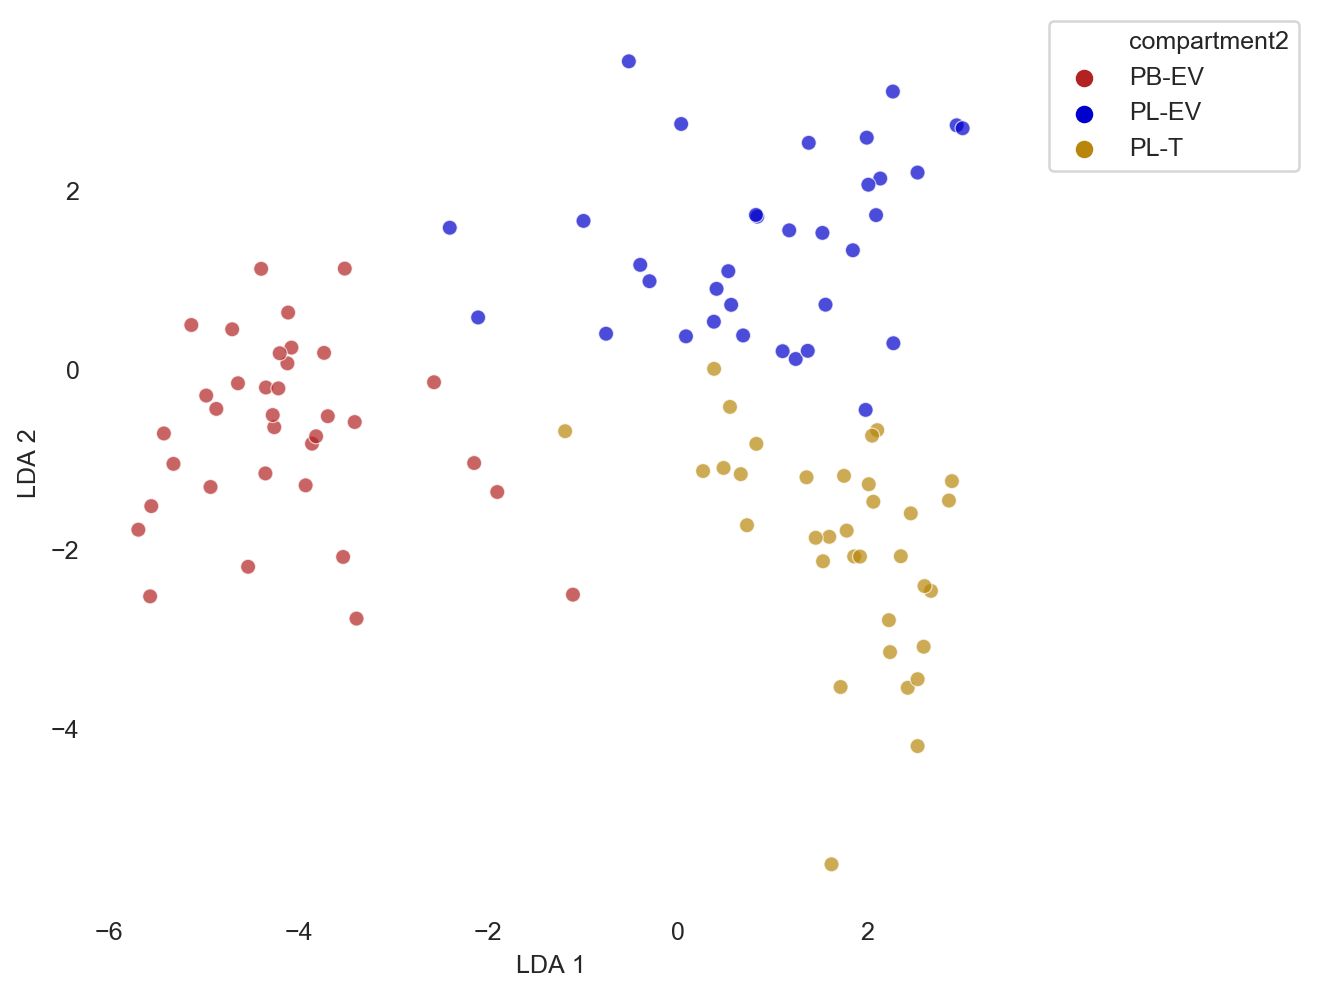

In [18]:
plt.rcParams['figure.dpi'] = 180
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(data = LDA, hue = 'compartment2', palette = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'},
                x='LDA 1', y='LDA 2', marker='o', linewidth = 0.5, alpha = 0.7, ax = ax)
sns.despine(f, left=True, bottom=True)
sns.set_style("whitegrid", {'axes.grid' : False})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)